<a href="https://colab.research.google.com/github/biranchi2018/Intro_to_ML/blob/main/3.Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [66]:
!wget https://github.com/biranchi2018/Intro_to_ML/blob/main/Iris.csv

--2023-06-18 06:45:38--  https://github.com/biranchi2018/Intro_to_ML/blob/main/Iris.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Iris.csv.1’

Iris.csv.1              [ <=>                ] 190.22K  --.-KB/s    in 0.08s   

2023-06-18 06:45:38 (2.36 MB/s) - ‘Iris.csv.1’ saved [194789]



In [ ]:
file_name = 'Iris.csv'

In [ ]:
df = pd.read_csv(file_name)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.drop(['Id', 'Species'], axis=1, inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
kmeans = KMeans(n_clusters=3,
                init = 'k-means++',
                max_iter = 100,
                n_init = 10,
                random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [ ]:
y_kmeans[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
total_no_data_points = len(df)
total_no_data_points

150

In [ ]:
unique_values_arr, counts_arr = np.unique(y_kmeans, return_counts=True)

In [ ]:
unique_values_arr

array([0, 1, 2], dtype=int32)

In [ ]:
counts_arr

array([62, 50, 38])

In [ ]:
for group, counts in zip(unique_values_arr, counts_arr):
  print(f'Group {group} : {counts}')

Group 0 : 62
Group 1 : 50
Group 2 : 38


In [ ]:
print(kmeans.cluster_centers_) #display cluster centers

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


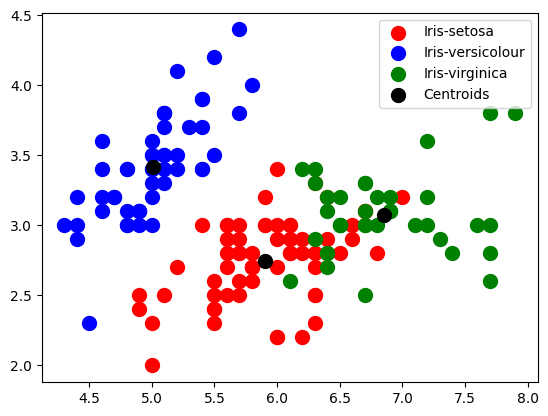

In [ ]:
plt.scatter(df.values[y_kmeans   == 0, 0], df.values[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df.values[y_kmeans   == 1, 0], df.values[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df.values[y_kmeans   == 2, 0], df.values[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()